### Step1:python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step2:Reading dataset

In [2]:
df=pd.read_csv("covid_toy.csv")

In [3]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [4]:
df.columns


Index(['age', 'gender', 'fever', 'cough', 'city', 'has_covid'], dtype='object')

In [5]:
df.shape

(100, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [8]:
df.nunique()

age          55
gender        2
fever         7
cough         2
city          4
has_covid     2
dtype: int64

* Gender is classify as male and female
*  city is classify in to 4 category
* cough is classify as mild and strong
* has covid classify person has covid or not

### Numerical and Categorical columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are",num_cols)

Categorical Variables are  Index(['gender', 'cough', 'city', 'has_covid'], dtype='object')
Numerical Variables are ['age', 'fever']


#### EDA explortory data analysis

In [11]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


### Univariate analysis

#### Categorical variable can be visualised using a countplot ,Bar chart ,piechartetc.
##### Numerical variable can be visualised by using Histogram,Box plot, Density plot

age


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


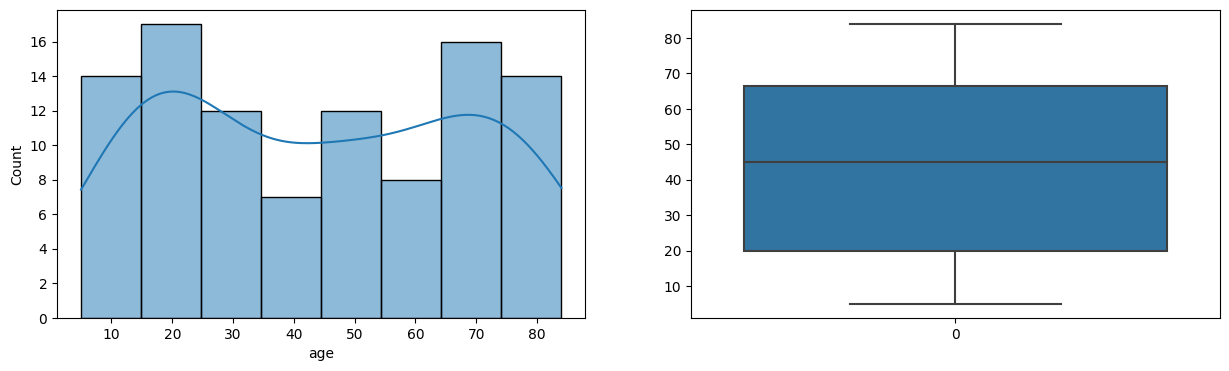

fever


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


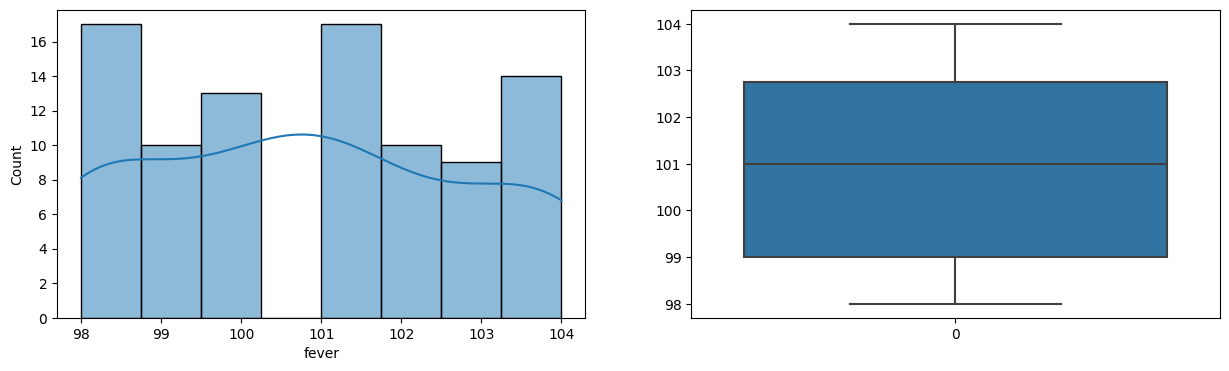

In [11]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

age
fever


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


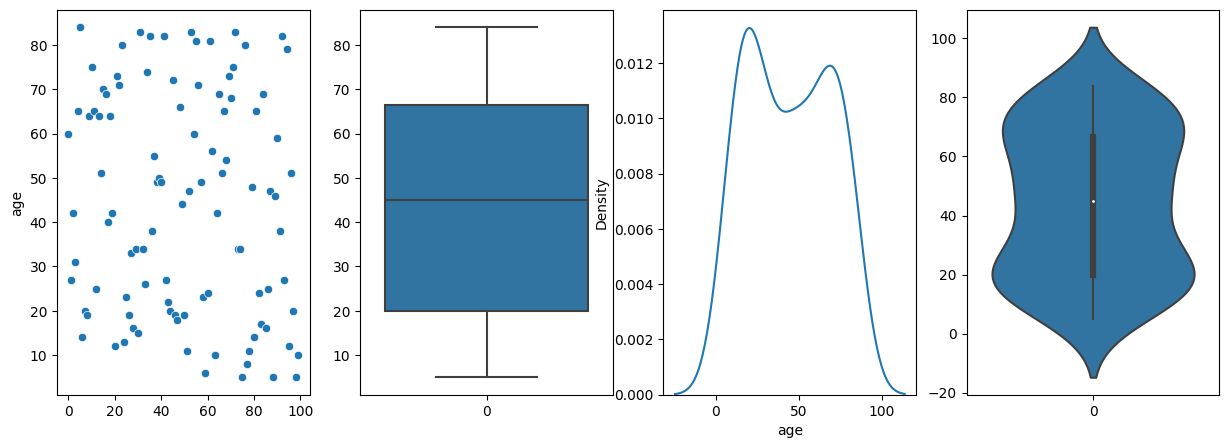

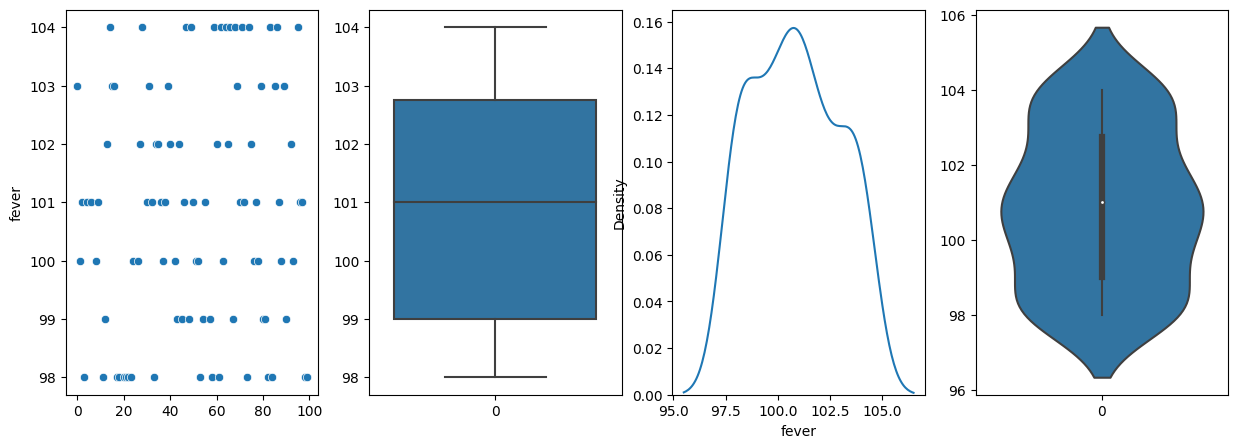

In [14]:
for i in num_cols:
    
        print(i)
        plt.figure(figsize=(15,5))
        
        plt.subplot(1,4,1,)
        sns.scatterplot(df[i])
        # sns.histplot(df[i],kde=True)
        plt.subplot(1,4,2)
        sns.boxplot(df[i])
        plt.subplot(1,4,3)
        sns.kdeplot(x=df[i],data=df)
        plt.subplot(1,4,4)
        sns.violinplot(df[i])
         
        plt.plot

Distribution of the data in gender


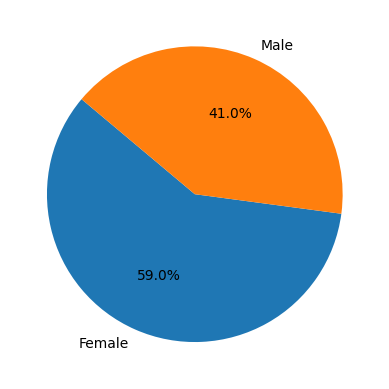

Distribution of the data in cough


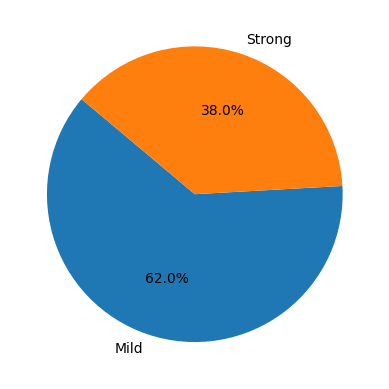

Distribution of the data in city


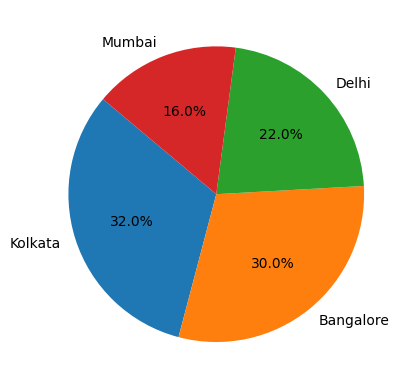

Distribution of the data in has_covid


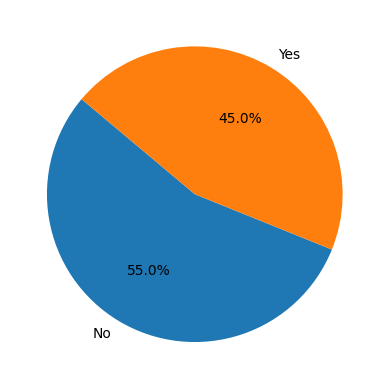

In [15]:
for i in cat_cols:
    print('Distribution of the data in',i)
    value_counts = df[i].value_counts()
    
    # Plot the pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    # plt.title('Distribution of COVID-19 Cases'), startangle=140
    plt.show()

gender


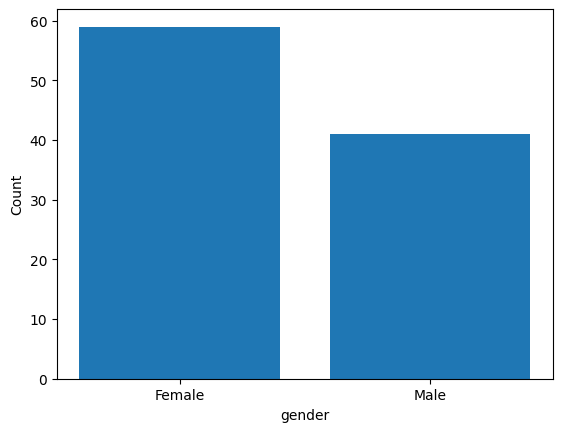

cough


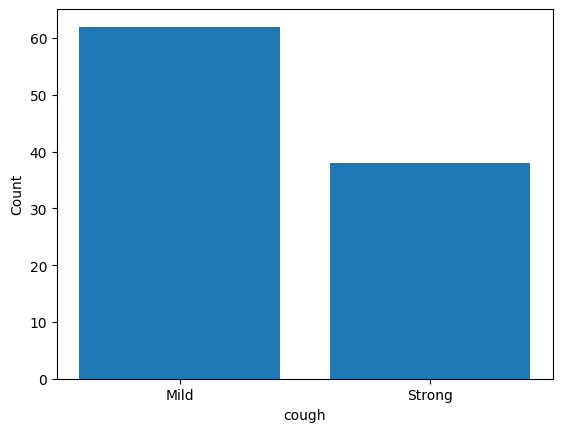

city


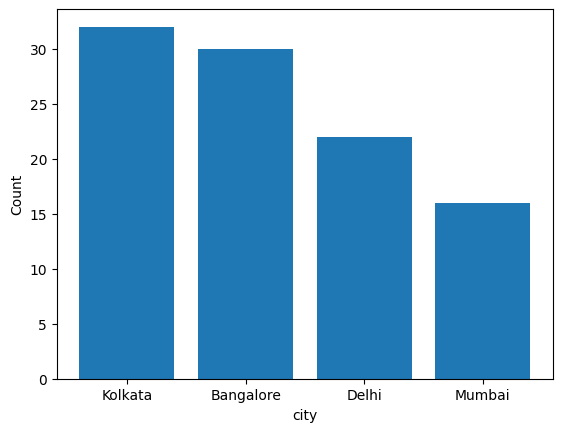

has_covid


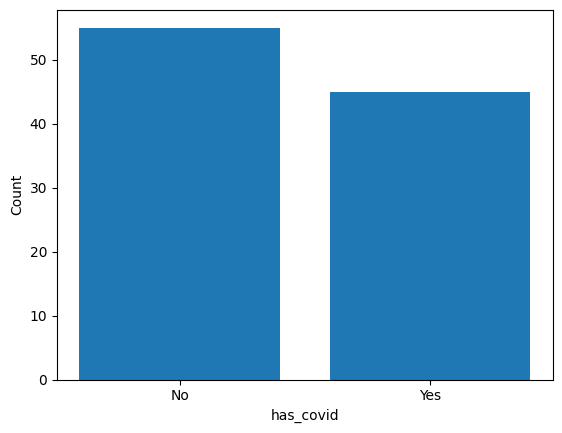

In [13]:
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Obseravtion
* most of them are female
* kolkata has most of the covid cases
* many of them has mild fever
* and most of them has no covid

#### Bivariate analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


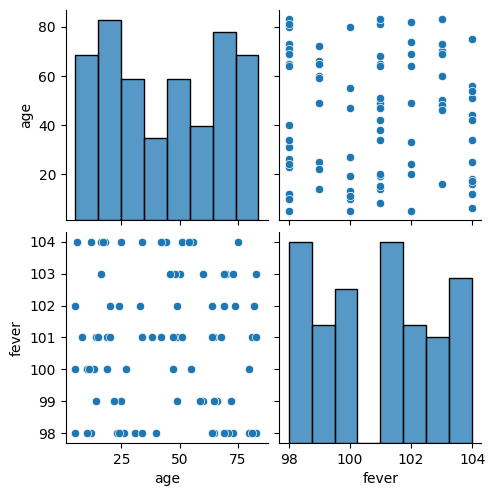

In [14]:
sns.pairplot(df)
plt.show()

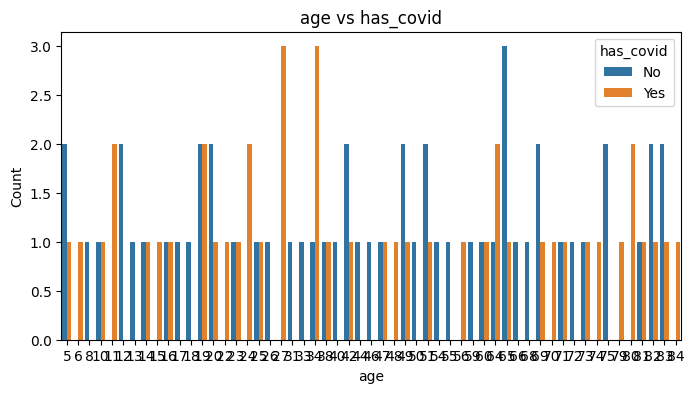

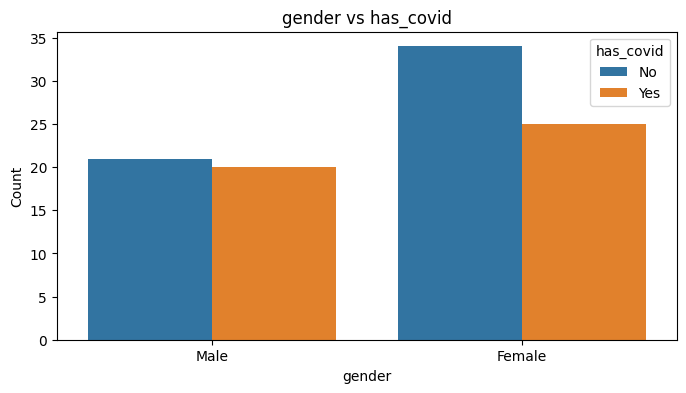

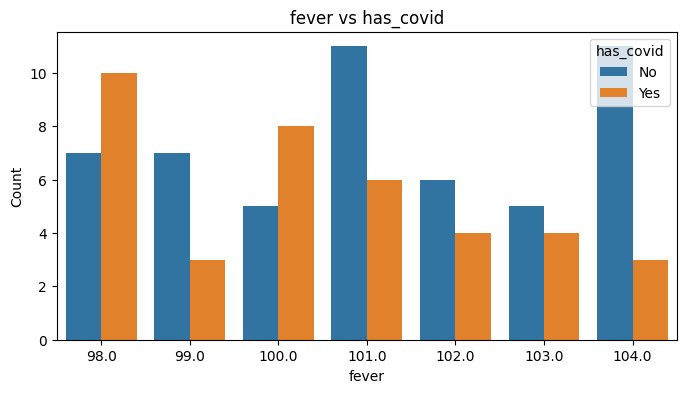

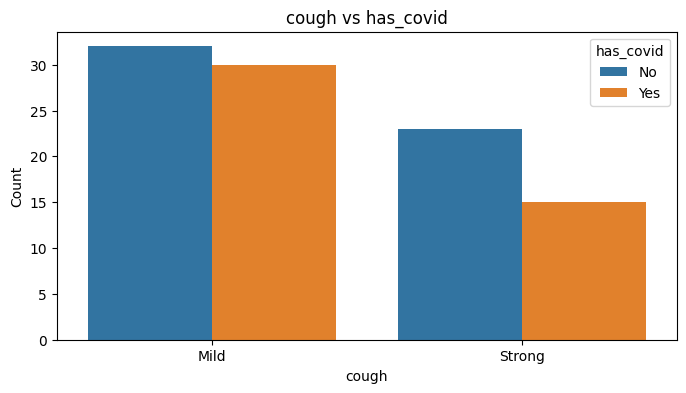

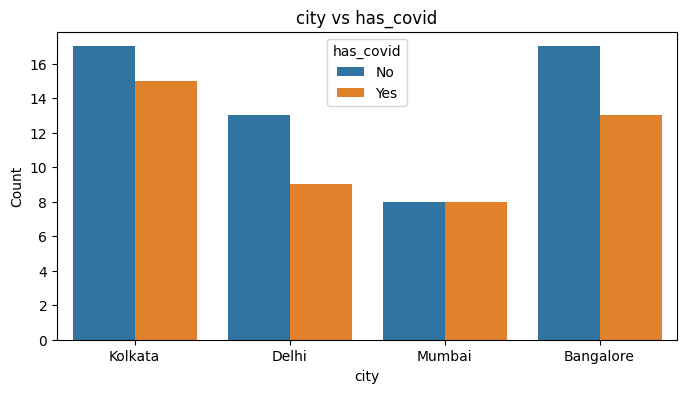

In [15]:
for col in df.columns:
    if col != "has_covid":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="has_covid", data=df)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs has_covid")
        plt.show()

### Multivariate Analysis

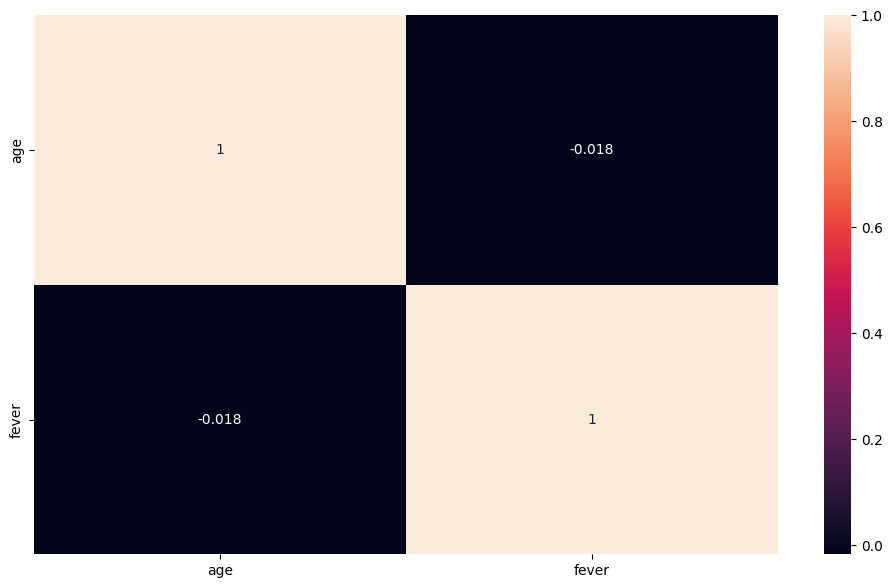

In [16]:
df1=df.select_dtypes(exclude=['object'])
plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Step6: Features Engineering

In [17]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


age


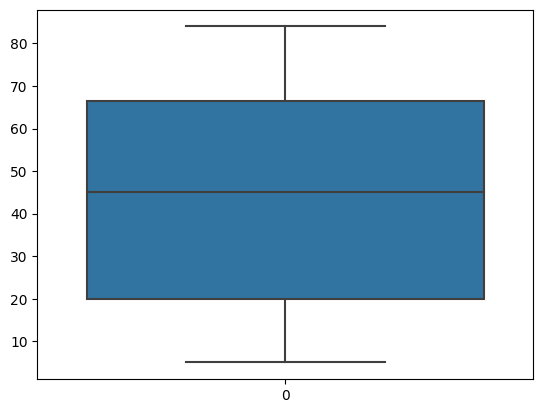

fever


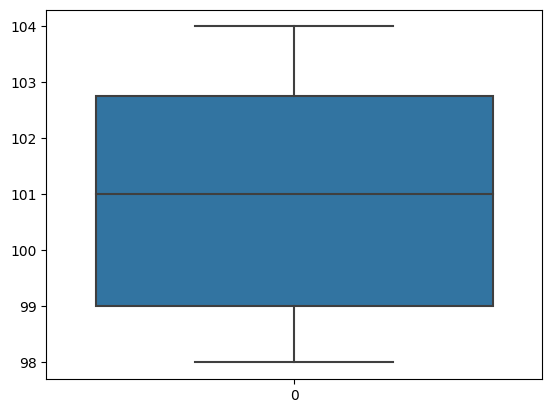

In [18]:
for col in num_cols:
    print(col)
    sns.boxplot(df[col])
    plt.show()

#### Data encoding

In [19]:
cat_cols

Index(['gender', 'cough', 'city', 'has_covid'], dtype='object')

In [20]:
type(cat_cols)

pandas.core.indexes.base.Index

gender


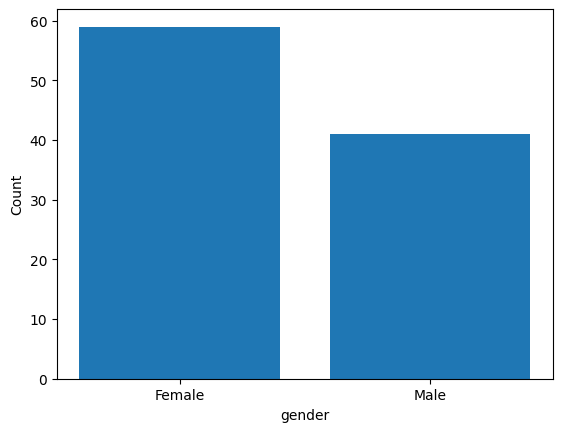

cough


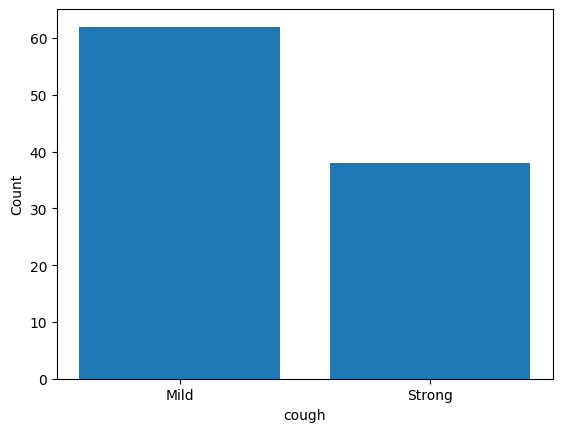

city


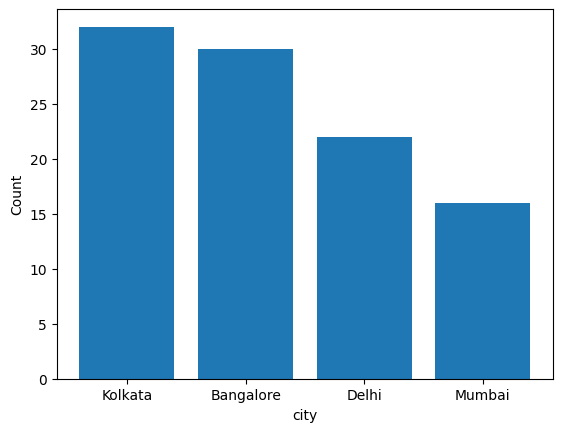

has_covid


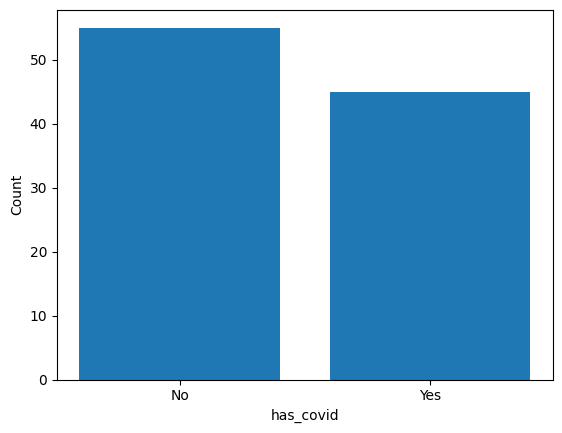

In [21]:
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Impute Missing Values

In [16]:
mean=df.fever.mean()
df['Imp_fever']=df['fever'].fillna(mean)
df

,age,gender,fever,cough,city,has_covid,Imp_fever
0,60,Male,103.0,Mild,Kolkata,No,103.0
1,27,Male,100.0,Mild,Delhi,Yes,100.0
2,42,Male,101.0,Mild,Delhi,No,101.0
3,31,Female,98.0,Mild,Kolkata,No,98.0
4,65,Female,101.0,Mild,Mumbai,No,101.0
...,...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No,104.0
96,51,Female,101.0,Strong,Kolkata,Yes,101.0
97,20,Female,101.0,Mild,Bangalore,No,101.0
98,5,Female,98.0,Strong,Mumbai,No,98.0


In [17]:
df.drop(['fever'],inplace=True,axis=1)

In [18]:
df

,age,gender,cough,city,has_covid,Imp_fever
0,60,Male,Mild,Kolkata,No,103.0
1,27,Male,Mild,Delhi,Yes,100.0
2,42,Male,Mild,Delhi,No,101.0
3,31,Female,Mild,Kolkata,No,98.0
4,65,Female,Mild,Mumbai,No,101.0
...,...,...,...,...,...,...
95,12,Female,Mild,Bangalore,No,104.0
96,51,Female,Strong,Kolkata,Yes,101.0
97,20,Female,Mild,Bangalore,No,101.0
98,5,Female,Strong,Mumbai,No,98.0


In [19]:
df.isnull().sum()

age          0
gender       0
cough        0
city         0
has_covid    0
Imp_fever    0
dtype: int64

In [20]:
df.rename(columns={'Imp_fever':'fever'},inplace=True)
df.head()

,age,gender,cough,city,has_covid,fever
0,60,Male,Mild,Kolkata,No,103.0
1,27,Male,Mild,Delhi,Yes,100.0
2,42,Male,Mild,Delhi,No,101.0
3,31,Female,Mild,Kolkata,No,98.0
4,65,Female,Mild,Mumbai,No,101.0


#### Label encoding

In [21]:
df1=df.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [25]:
# Apply label encoding to the 'gender' column
df1['gender_encoded'] = le.fit_transform(df1['gender'])

# Print the first few rows to verify the encoding
print(df1[['gender', 'gender_encoded']].head())

   gender  gender_encoded
0    Male               1
1    Male               1
2    Male               1
3  Female               0
4  Female               0


In [26]:
df1['cough_encoded'] = le.fit_transform(df1['cough'])
print(df1[['cough','cough_encoded']].head())

  cough  cough_encoded
0  Mild              0
1  Mild              0
2  Mild              0
3  Mild              0
4  Mild              0


In [27]:

df1['has_covid_encoded'] = le.fit_transform(df1['has_covid'])
print(df1[['has_covid','has_covid_encoded']].head())

  has_covid  has_covid_encoded
0        No                  0
1       Yes                  1
2        No                  0
3        No                  0
4        No                  0


In [28]:

df1['city_encoded'] = le.fit_transform(df1['city'])
print(df1[['city','city_encoded']].head())

      city  city_encoded
0  Kolkata             2
1    Delhi             1
2    Delhi             1
3  Kolkata             2
4   Mumbai             3


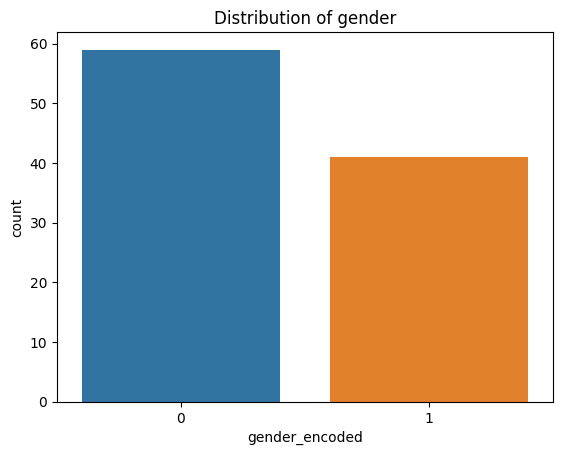

In [29]:
sns.countplot(x='gender_encoded', data=df1)
plt.title('Distribution of gender')
plt.show()

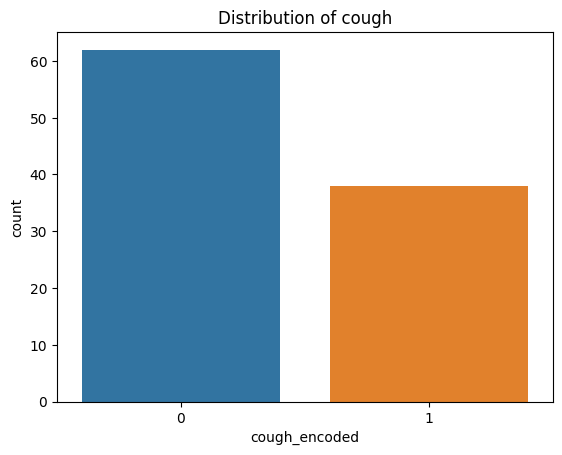

In [30]:
sns.countplot(x='cough_encoded', data=df1)
plt.title('Distribution of cough')
plt.show()

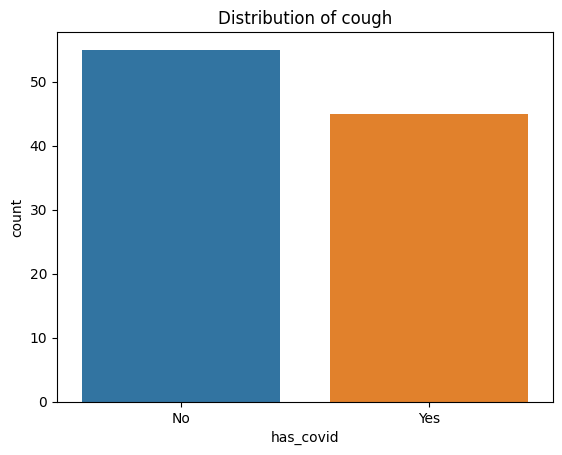

In [31]:
sns.countplot(x='has_covid',data=df1)
plt.title('Distribution of cough')
plt.show()

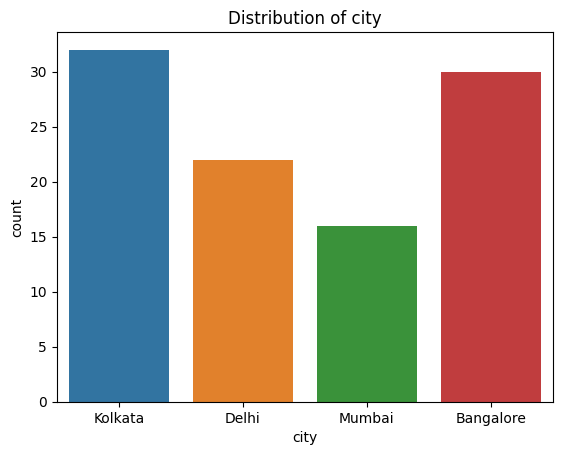

In [32]:
sns.countplot(x='city',data=df1)
plt.title('Distribution of city')
plt.show()

#### Observation
* here we uses
* in gender 1 for male and 0 for female.
* in cough mild=1 and strong=0.
* in has_covid No=0 and Yes=1.

In [33]:
df1.head()

,age,gender,cough,city,has_covid,fever,gender_encoded,cough_encoded,has_covid_encoded,city_encoded
0,60,Male,Mild,Kolkata,No,103.0,1,0,0,2
1,27,Male,Mild,Delhi,Yes,100.0,1,0,1,1
2,42,Male,Mild,Delhi,No,101.0,1,0,0,1
3,31,Female,Mild,Kolkata,No,98.0,0,0,0,2
4,65,Female,Mild,Mumbai,No,101.0,0,0,0,3


In [34]:
df1.drop(['gender','cough','has_covid','city'],axis=1,inplace=True)

In [35]:
df=df1

In [36]:
df

,age,fever,gender_encoded,cough_encoded,has_covid_encoded,city_encoded
0,60,103.0,1,0,0,2
1,27,100.0,1,0,1,1
2,42,101.0,1,0,0,1
3,31,98.0,0,0,0,2
4,65,101.0,0,0,0,3
...,...,...,...,...,...,...
95,12,104.0,0,0,0,0
96,51,101.0,0,1,1,2
97,20,101.0,0,0,0,0
98,5,98.0,0,1,0,3


In [49]:

#df.rename(columns={'gender':'gender_encoded','cough':'cough_encoded','city':'city_encoded','has_covid':'has_covid_encoded'},inplace=True)
df.rename(columns={
    'gender': 'gender_encoded',
    'cough': 'cough_encoded',
    'city': 'city_encoded',
    'has_covid': 'has_covid_encoded'
}, inplace=True)


In [50]:
df

,age,fever,gender_encoded,cough_encoded,has_covid_encoded,city_encoded
0,60,103.0,1,0,0,2
1,27,100.0,1,0,1,1
2,42,101.0,1,0,0,1
3,31,98.0,0,0,0,2
4,65,101.0,0,0,0,3
...,...,...,...,...,...,...
95,12,104.0,0,0,0,0
96,51,101.0,0,1,1,2
97,20,101.0,0,0,0,0
98,5,98.0,0,1,0,3


In [54]:
y=df['has_covid_encoded']
x=df.drop(["has_covid_encoded"],axis=1)

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
x_train


,age,fever,gender_encoded,cough_encoded,city_encoded
55,81,101.0,0,0,3
88,5,100.0,0,0,2
26,19,100.0,0,0,2
42,27,100.0,1,0,1
69,73,103.0,0,0,1
...,...,...,...,...,...
60,24,102.0,0,1,0
71,75,104.0,0,1,1
14,51,104.0,1,0,0
92,82,102.0,0,1,2


In [63]:
from sklearn.linear_model import LogisticRegression

In [69]:
LR=LogisticRegression()

In [70]:
LR.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred=LR.predict(x_test)

In [72]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.75

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
DT=DecisionTreeClassifier()

In [78]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred=DT.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [84]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy_score(y_pred,y_test)


0.5

In [85]:
import pickle

In [87]:
# save the model to a file
filename = 'Covid_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(LR, file)

In [88]:
pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install eli5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [90]:
from pycaret.regression import *
s=setup(data=df,target='has_covid_encoded')

,Description,Value
0,Session id,2876
1,Target,has_covid_encoded
2,Target type,Regression
3,Original data shape,"(100, 6)"
4,Transformed data shape,"(100, 6)"
5,Transformed train set shape,"(70, 6)"
6,Transformed test set shape,"(30, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [91]:
cm=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.4989,0.2545,0.5036,-0.3086,0.3547,0.5714,0.0080
llar,Lasso Least Angle Regression,0.4989,0.2545,0.5036,-0.3086,0.3547,0.5714,0.0090
dummy,Dummy Regressor,0.4989,0.2545,0.5036,-0.3086,0.3547,0.5714,0.0070
en,Elastic Net,0.4994,0.2552,0.5044,-0.3129,0.3551,0.5752,0.0080
br,Bayesian Ridge,0.4996,0.2553,0.5045,-0.3137,0.3552,0.5755,0.0080
omp,Orthogonal Matching Pursuit,0.4978,0.2583,0.5072,-0.3568,0.3558,0.5889,0.0070
ridge,Ridge Regression,0.4981,0.2676,0.5164,-0.3944,0.3627,0.5855,0.0070
lr,Linear Regression,0.4986,0.2689,0.5176,-0.4007,0.3636,0.5863,0.0070
lar,Least Angle Regression,0.4986,0.2689,0.5176,-0.4007,0.3636,0.5863,0.0110
huber,Huber Regressor,0.5039,0.2750,0.5233,-0.4303,0.3678,0.5975,0.0120


Processing:   0%|          | 0/77 [00:00<?, ?it/s]